In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_asso_50Hz_reci = data[(data['Ptl_note']=='50Hz IE high freq')&(data['Reci']==1)]
data_asso_50Hz_uni = data[(data['Ptl_note']=='50Hz IE high freq')&(data['Reci']==0)]
data_asso_50Hz = data[(data['Ptl_note']=='50Hz IE high freq')]

In [4]:
data_asso_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
45,2016100202,26,2,0,1,0,2,"23,24","26,27,28",5,0,Robust LTD,50Hz IE high freq
46,2016110202,30,2,0,1,0,2,9,"11,12, 13,14",5,0,NaN,50Hz IE high freq
47,2016111103,24,1,0,1,0,2,12,"14,15,16,17",5,0,NaN,50Hz IE high freq
48,2016111802,22,1,0,1,0,2,3,"6,7,8,9,10,11",5,15,"Robust LTD, increased PPR",50Hz IE high freq
50,2016111104,24,1,0,1,0,2,6,8,5,0,NaN,50Hz IE high freq


In [5]:
data_asso_50Hz_uni

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
40,2016102702,27,1,0,0,0,2,"4,5,6","10,11,12",5,0,"No change, potential LTP",50Hz IE high freq
41,2016111001,24,1,0,0,1,2,22,"24,25,26,27,28",5,0,"No change, potential LTP",50Hz IE high freq
42,2016120201,26,1,0,0,0,2,18,"20,21,22,23",5,0,NaN,50Hz IE high freq
43,2016120501,29,2,0,0,0,2,6,"9,10,11",5,12,"Robust LTD, Increased PPR",50Hz IE high freq
44,2017050901,25,2,1,0,0,1,12,15,5,12,NaN,50Hz IE high freq
49,2016100203,26,1,0,0,0,2,15,17,5,0,NaN,50Hz IE high freq
51,2016120403,28,3,0,0,0,2,"15,16","18,19",5,0,"No change, Increased Onset tau",50Hz IE high freq


<Container object of 3 artists>

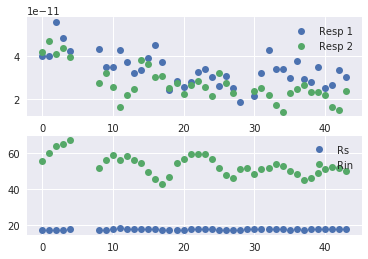

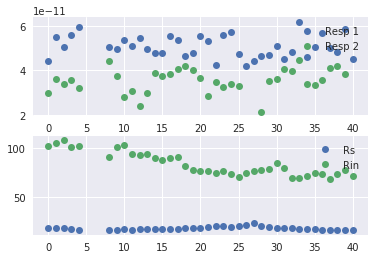

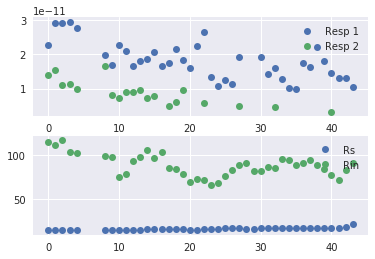

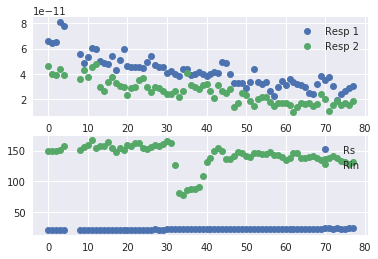

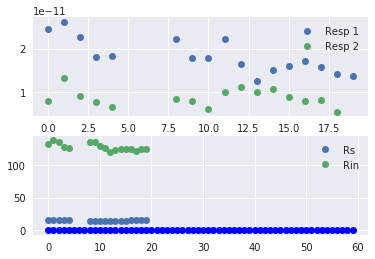

In [6]:
patch_pip.df_ana(data_asso_50Hz_reci,'/data/data_asso_IE_50Hz_reci')
asso_50Hz_reci = pd.read_pickle('/data/data_asso_IE_50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [7]:
elimi = np.array([40, 40, 40, 30, 15])
elimi_sr = pd.Series(elimi, index=asso_50Hz_reci.index)
asso_50Hz_reci['elimi']=elimi_sr
asso_50Hz_reci.to_pickle('/data/ana_asso_IE_50Hz_reci')

/src/Patch_ana/Patch_ana/patch_pip.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  ir = 0.005 / np.mean(trial_demean[ir_region]) * 1e-6 - 20


<Container object of 3 artists>

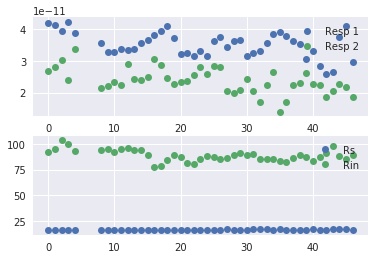

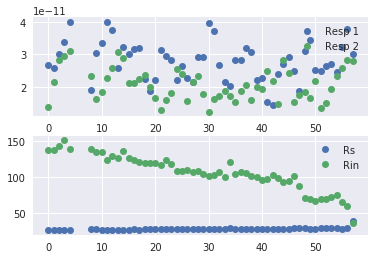

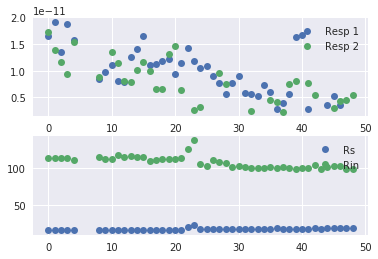

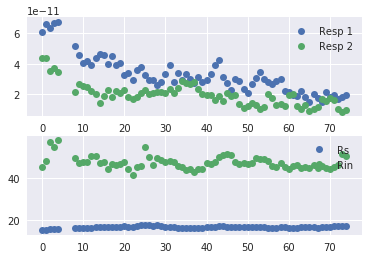

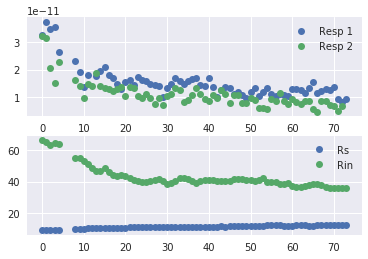

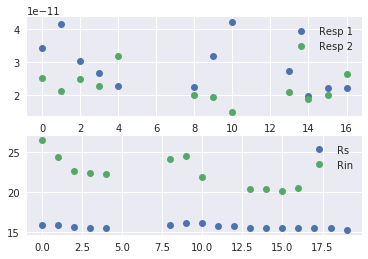

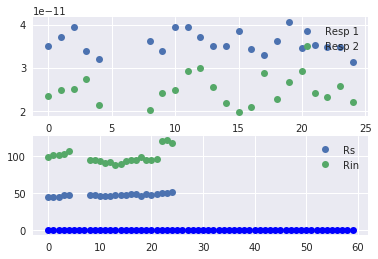

In [8]:
patch_pip.df_ana(data_asso_50Hz_uni,'/data/data_asso_IE_50Hz_uni')
asso_50Hz_uni = pd.read_pickle('/data/data_asso_IE_50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_uni)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [9]:
elimi = np.array([40,55,40,50,50,15,20])
elimi_sr = pd.Series(elimi, index=asso_50Hz_uni.index)
asso_50Hz_uni['elimi']=elimi_sr
asso_50Hz_uni.to_pickle('/data/ana_asso_IE_50Hz_uni')

In [10]:
post_50Hz = pd.concat([asso_50Hz_uni, asso_50Hz_reci], axis=0)
post_50Hz.to_pickle('/data/ana_asso_IE_50Hz')